In [43]:
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

In [3]:
with open("options.txt", 'r') as f:
    options = f.readlines()
    options = {option.split("=")[0]: option.split("=")[1].strip() for option in options}
print(options)

{'hanoi_scenario_dir': 'C:\\Users\\mjnst\\Desktop\\Thesis\\Hanoi_CMH\\Scenario-15', 'RUG_dir': 'C:\\Users\\mjnst\\Desktop\\Thesis\\RUG_data_5years'}


In [ ]:
# RUG = pd.read_json(f'{options["RUG_dir"]}/summary.json')

In [ ]:
# display(RUG)

In [ ]:
# RUG.to_pickle(f'{options["RUG_dir"]}/summary.pkl')

In [29]:
RUG = pd.read_pickle(f'{options["RUG_dir"]}/summary.pkl')
RUG.columns = [i.replace(r'\\PIAF\Module Database\Vitens', "") for i in RUG_1.columns]

In [31]:
RUG.tail()

,\GEN Gelderland-Noord\GEN-08 Ede\Pompstation Edese bos\03 Distributie\02 Reinwaterdistributie\Straat 03 Inname La Cabine\Volumestroommeting|meetwaarde|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-01 Oosterbeek-hoog\GE 3554082 Fletcher Hotel Exploitaties BV|Rapportage|Levering|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-01 Oosterbeek-hoog|Meetwaarde|Restpatroon|Demand-patroon|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-02 Oosterbeek Wolfheze|Meetwaarde|Restpatroon|Demand-patroon|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-03 Oosterbeek-laag|Meetwaarde|Restpatroon|Demand-patroon|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-04 Renkum-Heelsum\GE 14579265 BMC Renkum|Rapportage|Levering|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-04 Renkum-Heelsum\GE 3547303 Parenco BV|Rapportage|Levering|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-04 Renkum-Heelsum\GE 3563387 Oranje Nassau Oord St Zinzia Zorggroep|Rapportage|Levering|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-04 Renkum-Heelsum|Meetwaarde|Restpatroon|Demand-patroon|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\Pompstation Oosterbeek\03 Distributie\02 Reinwaterdistributie\Straat 01 Oosterbeek Hoog\Drukmeting|Head|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\Pompstation Oosterbeek\03 Distributie\02 Reinwaterdistributie\Straat 02 Oosterbeek Laag\Drukmeting|Head|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\Reservoir Doorwerth\03 Distributie\02 Reinwaterdistributie\Straat 01 Doorwerth\Volumestroommeting|meetwaarde|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\Reservoir Doorwerth\03 Distributie\02 Reinwaterdistributie\Straat 02 Renkum Heelsum\Drukmeting|Head|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\Reservoir Doorwerth\03 Distributie\02 Reinwaterdistributie\Straat 03 Inname Oosterbeek\Volumestroommeting|Meetwaarde|Target,\GEN Gelderland-Noord\GEN-10 Wageningseberg\Pompstation Wageningseberg\03 Distributie\02 Reinwaterdistributie\Straat 01 Renkum Heelsum\Drukmeting|Head|Target,\GEN Gelderland-Noord\GEN-10 Wageningseberg\Pompstation Wageningseberg\03 Distributie\02 Reinwaterdistributie\Straat 01 Renkum Heelsum\Volumestroommeting|meetwaarde|Target,\GEO Gelderland-Oost\GOZ Gelderland-Oost-Zuid\GEO-06 La Cabine-Arnhem-Noord\Pompstation La Cabine\03 Distributie\02 Reinwaterdistributie\Straat 02 Lage zone\Drukmeting LZ|Head|Target
2022-10-31 23:55:00+01:00,63.642857,0.084,0.447467,0.379683,0.630685,0.0,1.56,0.48,0.598195,86.617845,68.795775,0.068382,54.287846,89.818886,55.533346,0.0,70.484617
2022-10-31 23:56:00+01:00,63.930565,0.084,0.444268,0.222120,0.666094,0.0,1.56,0.48,0.660832,86.549566,68.890125,0.068355,54.288759,89.618172,55.866599,0.0,70.438112
2022-10-31 23:57:00+01:00,65.248125,0.084,0.455392,0.461382,0.607278,0.0,1.56,0.48,0.577945,86.512148,68.972139,0.068329,54.289673,89.408001,55.561931,0.0,70.394276
2022-10-31 23:58:00+01:00,68.420625,0.084,0.455503,0.486914,0.675756,0.0,1.56,0.48,0.670313,86.533104,68.950788,0.068302,54.290586,89.240522,55.964620,0.0,70.447790
2022-10-31 23:59:00+01:00,73.584479,0.084,0.487314,0.204248,0.598753,0.0,1.56,0.48,0.563101,86.584563,68.681880,0.068276,54.291500,89.170500,55.800549,0.0,70.417021


In [34]:
RUG.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3067200 entries, 2017-01-01 00:00:00+01:00 to 2022-10-31 23:59:00+01:00
Data columns (total 17 columns):
 #   Column                                                                                                                                                                                  Dtype  
---  ------                                                                                                                                                                                  -----  
 0   \GEN Gelderland-Noord\GEN-08 Ede\Pompstation Edese bos\03 Distributie\02 Reinwaterdistributie\Straat 03 Inname La Cabine\Volumestroommeting|meetwaarde|Target                           float64
 1   \GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-01 Oosterbeek-hoog\GE 3554082 Fletcher Hotel Exploitaties BV|Rapportage|Levering|Target                                                  float64
 2   \GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-01 Oosterb

In [38]:
display(RUG.apply(lambda x: x.isnull().sum()))

\GEN Gelderland-Noord\GEN-08 Ede\Pompstation Edese bos\03 Distributie\02 Reinwaterdistributie\Straat 03 Inname La Cabine\Volumestroommeting|meetwaarde|Target                                 17
\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-01 Oosterbeek-hoog\GE 3554082 Fletcher Hotel Exploitaties BV|Rapportage|Levering|Target                                                       470
\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-01 Oosterbeek-hoog|Meetwaarde|Restpatroon|Demand-patroon|Target                                                                             17121
\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-02 Oosterbeek Wolfheze|Meetwaarde|Restpatroon|Demand-patroon|Target                                                                        349306
\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-03 Oosterbeek-laag|Meetwaarde|Restpatroon|Demand-patroon|Target                                                                             17112
\GEN Gelderland-Noord\GEN-09 Ooster

In [33]:
RUG.describe()

,\GEN Gelderland-Noord\GEN-08 Ede\Pompstation Edese bos\03 Distributie\02 Reinwaterdistributie\Straat 03 Inname La Cabine\Volumestroommeting|meetwaarde|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-01 Oosterbeek-hoog\GE 3554082 Fletcher Hotel Exploitaties BV|Rapportage|Levering|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-01 Oosterbeek-hoog|Meetwaarde|Restpatroon|Demand-patroon|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-02 Oosterbeek Wolfheze|Meetwaarde|Restpatroon|Demand-patroon|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-03 Oosterbeek-laag|Meetwaarde|Restpatroon|Demand-patroon|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-04 Renkum-Heelsum\GE 14579265 BMC Renkum|Rapportage|Levering|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-04 Renkum-Heelsum\GE 3547303 Parenco BV|Rapportage|Levering|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-04 Renkum-Heelsum\GE 3563387 Oranje Nassau Oord St Zinzia Zorggroep|Rapportage|Levering|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-04 Renkum-Heelsum|Meetwaarde|Restpatroon|Demand-patroon|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\Pompstation Oosterbeek\03 Distributie\02 Reinwaterdistributie\Straat 01 Oosterbeek Hoog\Drukmeting|Head|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\Pompstation Oosterbeek\03 Distributie\02 Reinwaterdistributie\Straat 02 Oosterbeek Laag\Drukmeting|Head|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\Reservoir Doorwerth\03 Distributie\02 Reinwaterdistributie\Straat 01 Doorwerth\Volumestroommeting|meetwaarde|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\Reservoir Doorwerth\03 Distributie\02 Reinwaterdistributie\Straat 02 Renkum Heelsum\Drukmeting|Head|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\Reservoir Doorwerth\03 Distributie\02 Reinwaterdistributie\Straat 03 Inname Oosterbeek\Volumestroommeting|Meetwaarde|Target,\GEN Gelderland-Noord\GEN-10 Wageningseberg\Pompstation Wageningseberg\03 Distributie\02 Reinwaterdistributie\Straat 01 Renkum Heelsum\Drukmeting|Head|Target,\GEN Gelderland-Noord\GEN-10 Wageningseberg\Pompstation Wageningseberg\03 Distributie\02 Reinwaterdistributie\Straat 01 Renkum Heelsum\Volumestroommeting|meetwaarde|Target,\GEO Gelderland-Oost\GOZ Gelderland-Oost-Zuid\GEO-06 La Cabine-Arnhem-Noord\Pompstation La Cabine\03 Distributie\02 Reinwaterdistributie\Straat 02 Lage zone\Drukmeting LZ|Head|Target
count,3.067183e+06,3.066730e+06,3.050079e+06,2.717894e+06,3.050088e+06,2.494990e+06,3.067200e+06,3.067200e+06,3.067128e+06,3.067200e+06,3.067200e+06,3.063506e+06,3.067200e+06,3.067200e+06,3.067200e+06,2.996725e+06,3.067200e+06
mean,2.174125e+02,7.972131e-01,1.076306e+00,1.370534e+00,1.277443e+00,6.308282e-01,3.546196e+00,1.062430e+00,3.964111e-01,8.653220e+01,6.939272e+01,3.620681e+00,5.479293e+01,9.650965e+01,5.471429e+01,5.854928e+00,6.644575e+01
std,9.314660e+01,7.617477e-01,5.336698e-01,1.083315e+00,5.585855e-01,9.768930e-01,2.630897e+00,8.183363e-01,6.787766e-01,1.303967e+00,9.087785e-01,1.465899e+01,7.577433e-01,6.572683e+01,3.049685e+01,2.361815e+01,1.878207e+00
min,-4.699386e+01,-4.906211e+01,-1.662414e-01,-3.612935e+01,-1.305478e+00,-4.077946e+01,-3.192553e-01,0.000000e+00,-4.636971e-01,1.479335e+01,1.202188e+01,-1.186451e+03,5.198627e+01,-7.696875e+00,1.485000e+01,-1.679612e+01,2.360000e+01
25%,1.454037e+02,3.240000e-01,6.280698e-01,6.951739e-01,8.010728e-01,4.000000e-02,1.720000e+00,5.600000e-01,-7.691401e-02,8.646755e+01,6.902632e+01,-2.336838e-01,5.437005e+01,7.457190e+00,5.378978e+01,0.000000e+00,6.536645e+01
50%,2.403646e+02,7.000000e-01,1.089339e+00,1.320137e+00,1.325713e+00,2.760000e-01,2.370000e+00,9.600000e-01,0.000000e+00,8.661393e+01,6.957665e+01,2.943765e-02,5.458769e+01,1.004384e+02,5.458386e+01,0.000000e+00,6.632132e+01
75%,2.969941e+02,1.020000e+00,1.409961e+00,1.951666e+00,1.641878e+00,5.900000e-01,4.930000e+00,1.370000e+00,9.808954e-01,8.676603e+01,6.977092e+01,4.309314e-01,5.477936e+01,1.500994e+02,5.544287e+01,0.000000e+00,6.749256e+01
max,4.843688e+0

In [27]:
# pd.read_csv(r"C:\Users\mjnst\Desktop\Thesis\valves_oosterbeek_position_history.csv", sep=";")

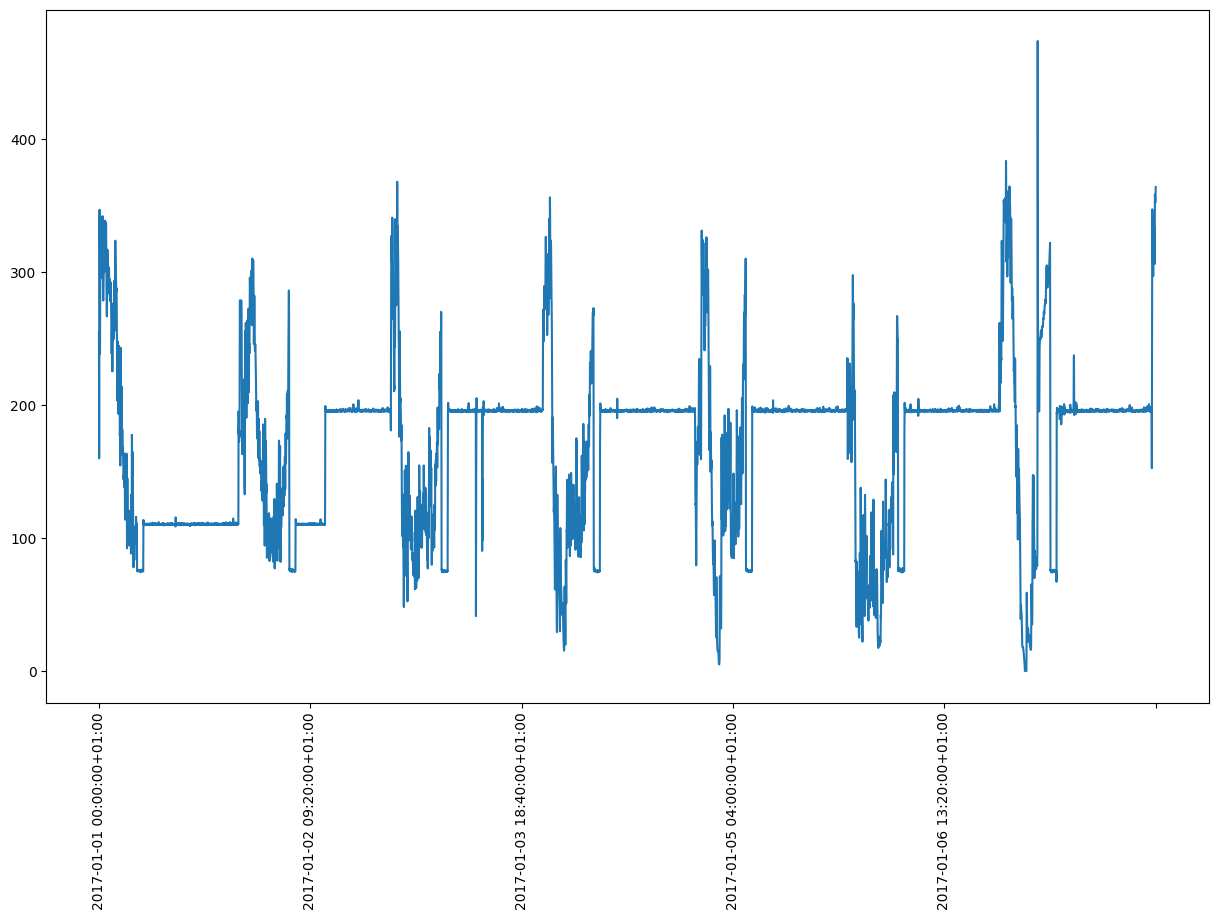

In [21]:
RUG[r'\GEN Gelderland-Noord\GEN-08 Ede\Pompstation Edese bos\03 Distributie\02 Reinwaterdistributie\Straat 03 Inname La Cabine\Volumestroommeting|meetwaarde|Target'][:10000].plot(figsize=(15, 9), title='Volumestroommeting')
plt.xticks(rotation=90)
plt.show()

C:\Users\mjnst\AppData\Local\Temp\ipykernel_6264\2147130727.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RUG[r'\GEN Gelderland-Noord\GEN-08 Ede\Pompstation Edese bos\03 Distributie\02 Reinwaterdistributie\Straat 03 Inname La Cabine\Volumestroommeting|meetwaarde|Target'], color='g', bins=100, hist_kws={'alpha': 0.4});


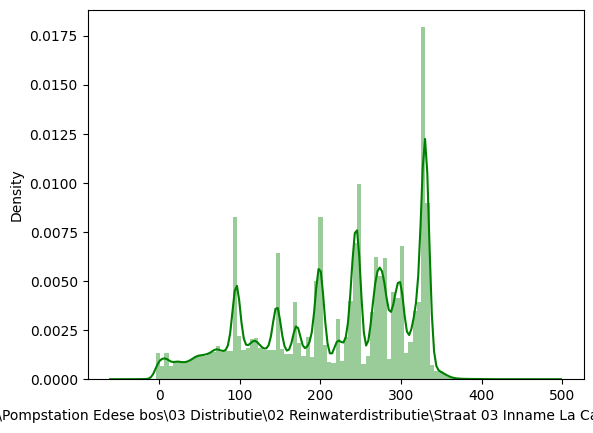

In [44]:
sns.distplot(RUG[r'\GEN Gelderland-Noord\GEN-08 Ede\Pompstation Edese bos\03 Distributie\02 Reinwaterdistributie\Straat 03 Inname La Cabine\Volumestroommeting|meetwaarde|Target'], color='g', bins=100, hist_kws={'alpha': 0.4});

array([[<AxesSubplot: title={'center': '\\GEN Gelderland-Noord\\GEN-08 Ede\\Pompstation Edese bos\\03 Distributie\\02 Reinwaterdistributie\\Straat 03 Inname La Cabine\\Volumestroommeting|meetwaarde|Target'}>,
        <AxesSubplot: title={'center': '\\GEN Gelderland-Noord\\GEN-09 Oosterbeek\\GEN-09-01 Oosterbeek-hoog\\GE 3554082 Fletcher Hotel Exploitaties BV|Rapportage|Levering|Target'}>,
        <AxesSubplot: title={'center': '\\GEN Gelderland-Noord\\GEN-09 Oosterbeek\\GEN-09-01 Oosterbeek-hoog|Meetwaarde|Restpatroon|Demand-patroon|Target'}>,
        <AxesSubplot: title={'center': '\\GEN Gelderland-Noord\\GEN-09 Oosterbeek\\GEN-09-02 Oosterbeek Wolfheze|Meetwaarde|Restpatroon|Demand-patroon|Target'}>],
       [<AxesSubplot: title={'center': '\\GEN Gelderland-Noord\\GEN-09 Oosterbeek\\GEN-09-03 Oosterbeek-laag|Meetwaarde|Restpatroon|Demand-patroon|Target'}>,
        <AxesSubplot: title={'center': '\\GEN Gelderland-Noord\\GEN-09 Oosterbeek\\GEN-09-04 Renkum-Heelsum\\GE 14579265 BMC Renk

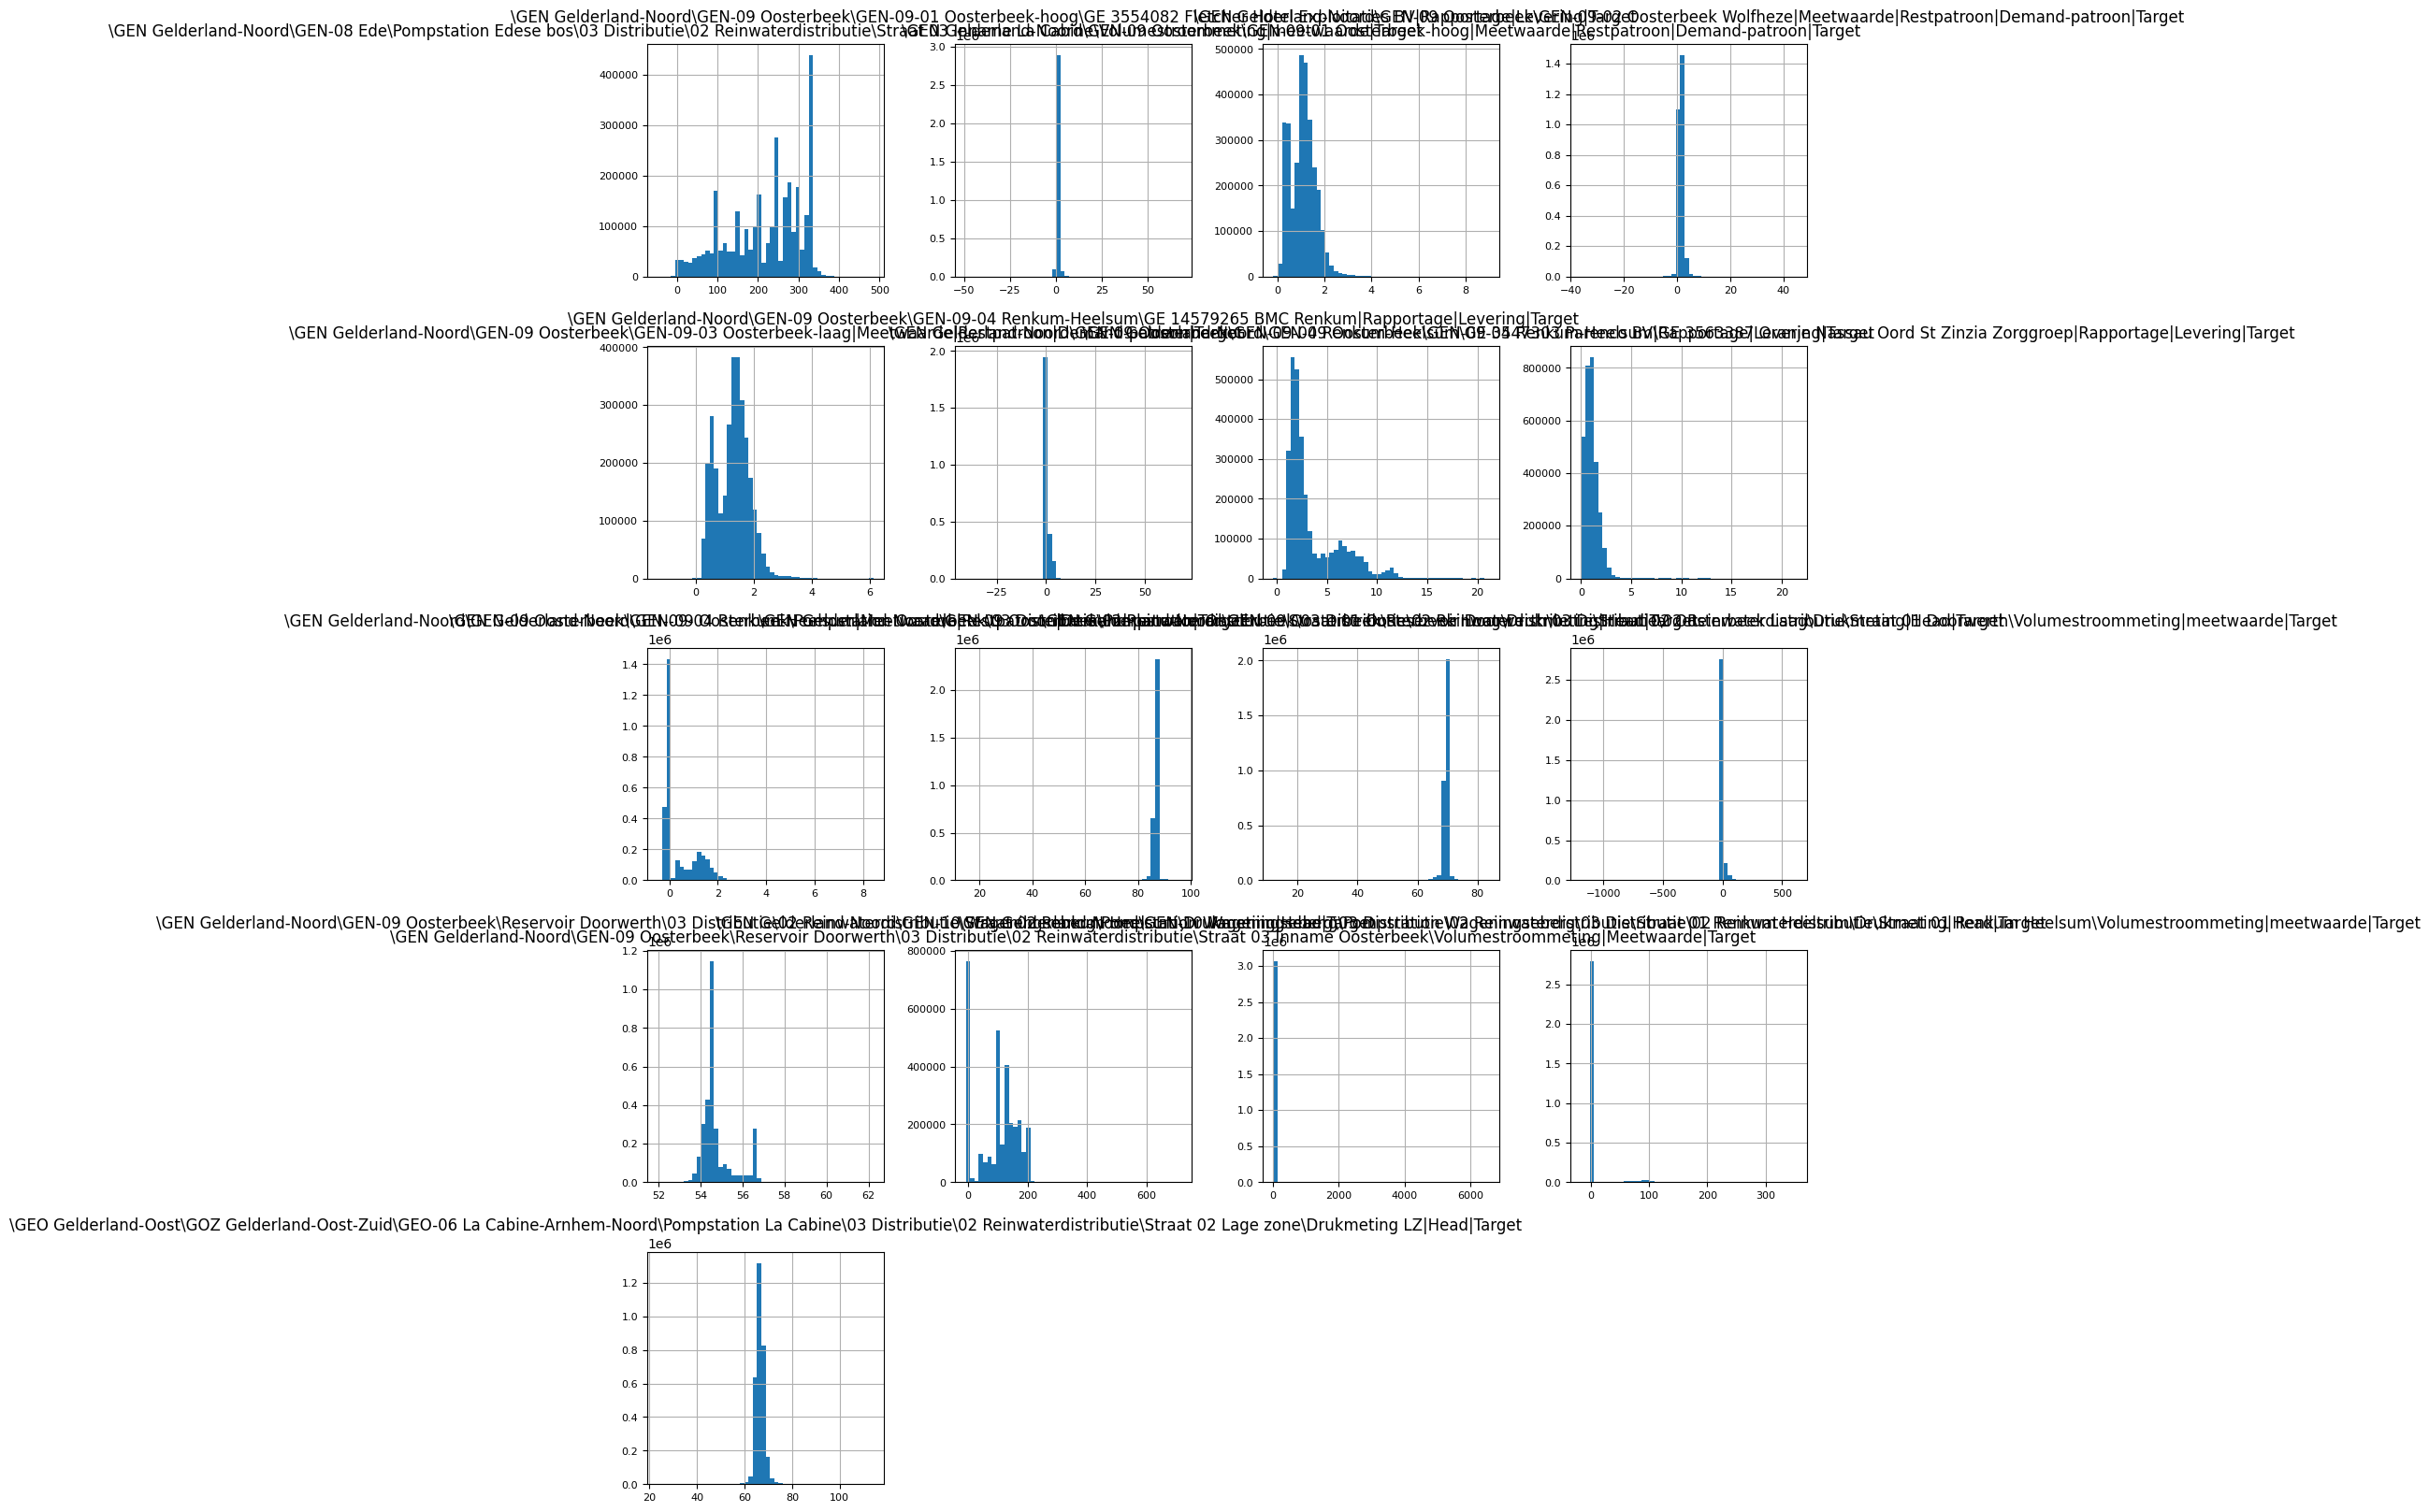

In [45]:
RUG.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

<AxesSubplot: >

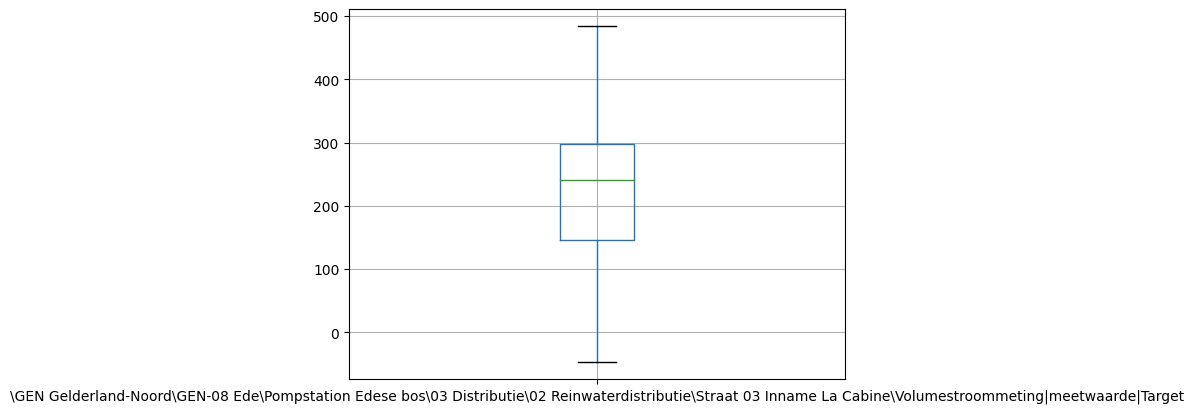

In [40]:
RUG.boxplot(column=[r'\GEN Gelderland-Noord\GEN-08 Ede\Pompstation Edese bos\03 Distributie\02 Reinwaterdistributie\Straat 03 Inname La Cabine\Volumestroommeting|meetwaarde|Target'])


,\GEN Gelderland-Noord\GEN-08 Ede\Pompstation Edese bos\03 Distributie\02 Reinwaterdistributie\Straat 03 Inname La Cabine\Volumestroommeting|meetwaarde|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-01 Oosterbeek-hoog\GE 3554082 Fletcher Hotel Exploitaties BV|Rapportage|Levering|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-01 Oosterbeek-hoog|Meetwaarde|Restpatroon|Demand-patroon|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-02 Oosterbeek Wolfheze|Meetwaarde|Restpatroon|Demand-patroon|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-03 Oosterbeek-laag|Meetwaarde|Restpatroon|Demand-patroon|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-04 Renkum-Heelsum\GE 14579265 BMC Renkum|Rapportage|Levering|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-04 Renkum-Heelsum\GE 3547303 Parenco BV|Rapportage|Levering|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-04 Renkum-Heelsum\GE 3563387 Oranje Nassau Oord St Zinzia Zorggroep|Rapportage|Levering|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-04 Renkum-Heelsum|Meetwaarde|Restpatroon|Demand-patroon|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\Pompstation Oosterbeek\03 Distributie\02 Reinwaterdistributie\Straat 01 Oosterbeek Hoog\Drukmeting|Head|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\Pompstation Oosterbeek\03 Distributie\02 Reinwaterdistributie\Straat 02 Oosterbeek Laag\Drukmeting|Head|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\Reservoir Doorwerth\03 Distributie\02 Reinwaterdistributie\Straat 01 Doorwerth\Volumestroommeting|meetwaarde|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\Reservoir Doorwerth\03 Distributie\02 Reinwaterdistributie\Straat 02 Renkum Heelsum\Drukmeting|Head|Target,\GEN Gelderland-Noord\GEN-09 Oosterbeek\Reservoir Doorwerth\03 Distributie\02 Reinwaterdistributie\Straat 03 Inname Oosterbeek\Volumestroommeting|Meetwaarde|Target,\GEN Gelderland-Noord\GEN-10 Wageningseberg\Pompstation Wageningseberg\03 Distributie\02 Reinwaterdistributie\Straat 01 Renkum Heelsum\Drukmeting|Head|Target,\GEN Gelderland-Noord\GEN-10 Wageningseberg\Pompstation Wageningseberg\03 Distributie\02 Reinwaterdistributie\Straat 01 Renkum Heelsum\Volumestroommeting|meetwaarde|Target,\GEO Gelderland-Oost\GOZ Gelderland-Oost-Zuid\GEO-06 La Cabine-Arnhem-Noord\Pompstation La Cabine\03 Distributie\02 Reinwaterdistributie\Straat 02 Lage zone\Drukmeting LZ|Head|Target
\GEN Gelderland-Noord\GEN-08 Ede\Pompstation Edese bos\03 Distributie\02 Reinwaterdistributie\Straat 03 Inname La Cabine\Volumestroommeting|meetwaarde|Target,1.000000,0.199334,0.456530,-0.032434,0.463280,-0.114796,-0.094129,0.281969,0.416484,0.034649,0.026795,0.083599,0.042033,0.127902,-0.011016,0.004842,0.000284
\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-01 Oosterbeek-hoog\GE 3554082 Fletcher Hotel Exploitaties BV|Rapportage|Levering|Target,0.199334,1.000000,0.351406,0.187809,0.351565,-0.053846,0.100110,0.172920,0.012652,0.006979,0.067834,0.110990,0.110483,0.086149,-0.006440,0.009243,0.003882
\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-01 Oosterbeek-hoog|Meetwaarde|Restpatroon|Demand-patroon|Target,0.456530,0.351406,1.000000,0.484651,0.941381,-0.162866,0.039850,0.394530,0.179736,-0.019399,0.143657,0.497629,0.308331,0.359385,-0.016827,0.082234,0.117946
\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-02 Oosterbeek Wolfheze|Meetwaarde|Restpatroon|Demand-patroon|Target,-0.032434,0.187809,0.484651,1.000000,0.509389,-0.029501,0.288655,0.148718,-0.229424,-0.015071,0.232626,0.292897,0.354666,0.195633,-0.009160,0.111194,0.201913
\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-03 Oosterbeek-laag|Meetwaarde|Restpatroon|Demand-patroon|Target,0.463280,0.351565,0.941381,0.509389,1.000000,-0.134850,0.116485,0.395546,0.148431,0.007653,0.177899,0.422999,0.330705,0.325169,-0.020213,0.096234,0.141657
\GEN Gelderland-Noord\GEN-09 Oosterbeek\GEN-09-04 Renkum-Heelsum\GE 14579265 BMC Renkum|Rapportage|Levering|Target,-0.114796,-0.053846,-0.162866,-0.029501,-0.134850,1.000000,0.078146,-0.049121,-0

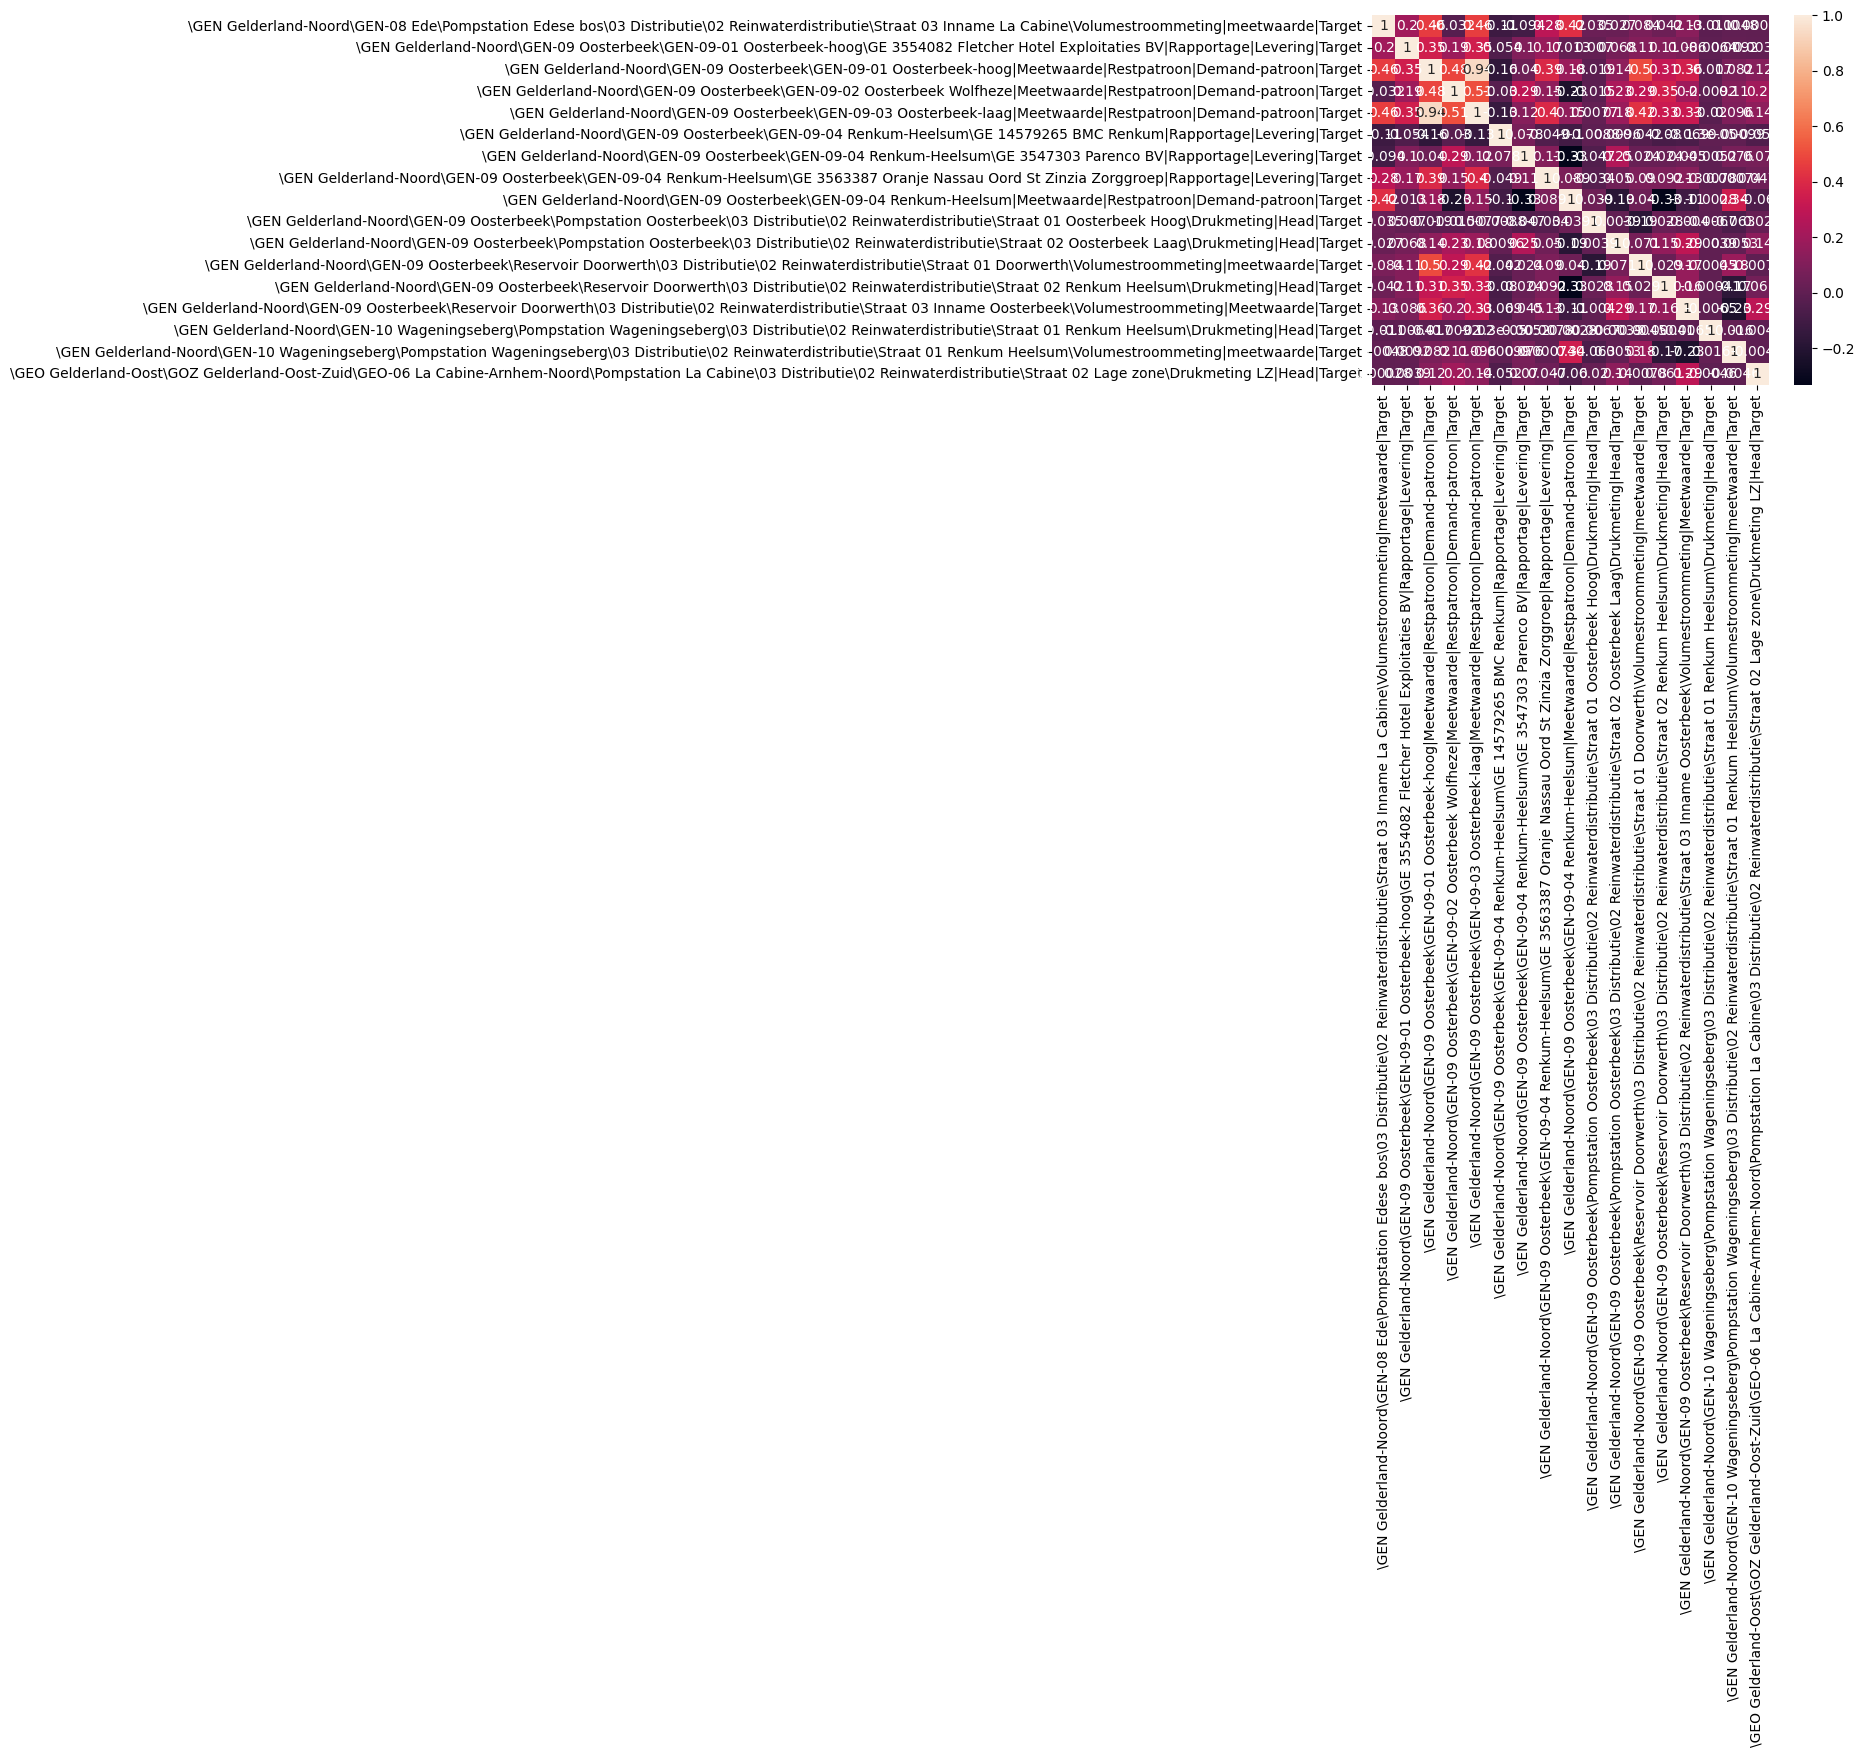

In [59]:
RUG_cor = RUG.corr()
display(RUG_cor)
sns.heatmap(RUG_cor, annot=True)
plt.show()

recorded = only existing values
summary json is actual existing sensor value + interpolated sensor values